In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import validation_curve

np.random.seed(43)

In [3]:
df = pd.read_csv("datasets/data2.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
import io
buffer = io.StringIO()
df.info(buf=buffer)
s = buffer.getvalue()
with open("df_info.txt", "w", encoding="utf-8") as f:
    f.write(s)

In [6]:
drop_columns = ["Id", "Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]
df = df.drop(drop_columns, axis=1)
df = df.dropna()
print(df.shape)

(1094, 74)


In [7]:
target = df["SalePrice"]
df = df.drop("SalePrice",axis=1)

In [8]:
ss = StandardScaler()

target = ss.fit_transform(target.values.reshape(-1,1))
target = target.reshape(-1)

In [9]:
class autoLabelEncoder:
    def __init__(self) -> None:
        self.cat_encoders:dict = {}

    def fit(self, data:pd.DataFrame, categories:list[str]) -> None:
        for feat in categories:
            enc = LabelEncoder()
            self.cat_encoders[feat] = enc.fit(data.loc[data[feat].notna(), feat])

    def transform(self, data:pd.DataFrame, categories:list[str]) -> pd.DataFrame:
        for feat in categories:
            if(feat in data.columns):
                enc = self.cat_encoders[feat]
                data.loc[data[feat].notna(), feat] = (enc.transform(data.loc[data[feat].notna(), feat]))
                data[feat] = data[feat].astype(int)
        return data
    
    def get_encoder(self, category) -> LabelEncoder:
        return self.cat_encoders[category]


In [10]:
objs = df.select_dtypes(include='object')
le = autoLabelEncoder()
le.fit(df, objs)
df = le.transform(df, objs)

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=1)

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


# 1. Выделите обучающую и отложенную выборку. Рассмотрим индивидуальные деревья (4 балла)

### a. Выполните 5-кратную перекрестную проверку, чтобы определить, какой будет наилучшая максимальная глубина для одного дерева регрессии, используя все признаки обучающего набора.

In [17]:
scoring = {'mse': make_scorer(mean_squared_error)}

for depth in range(1,15):
    random_fr = RandomForestRegressor(n_estimators=1, max_depth=depth, random_state=2, bootstrap=False)

    #print(-np.mean(cross_validate(rr,X_train,y_train,cv=5,scoring="neg_mean_squared_error")["test_score"]), f"depth {depth}")
    print(np.mean(cross_validate(random_fr,X_train,y_train,cv=5,scoring=scoring)["test_mse"]), f"depth {depth}")

0.5275140331615946 depth 1
0.38491555156227814 depth 2
0.2900847391741033 depth 3
0.2610183212763317 depth 4
0.2762645226065083 depth 5
0.270503341897025 depth 6
0.2646332000731313 depth 7
0.2378651755304034 depth 8
0.27217985669708333 depth 9
0.2392010469487719 depth 10
0.2864703318932228 depth 11
0.25338212070842203 depth 12
0.24041986849868321 depth 13
0.2473718917535784 depth 14


[]

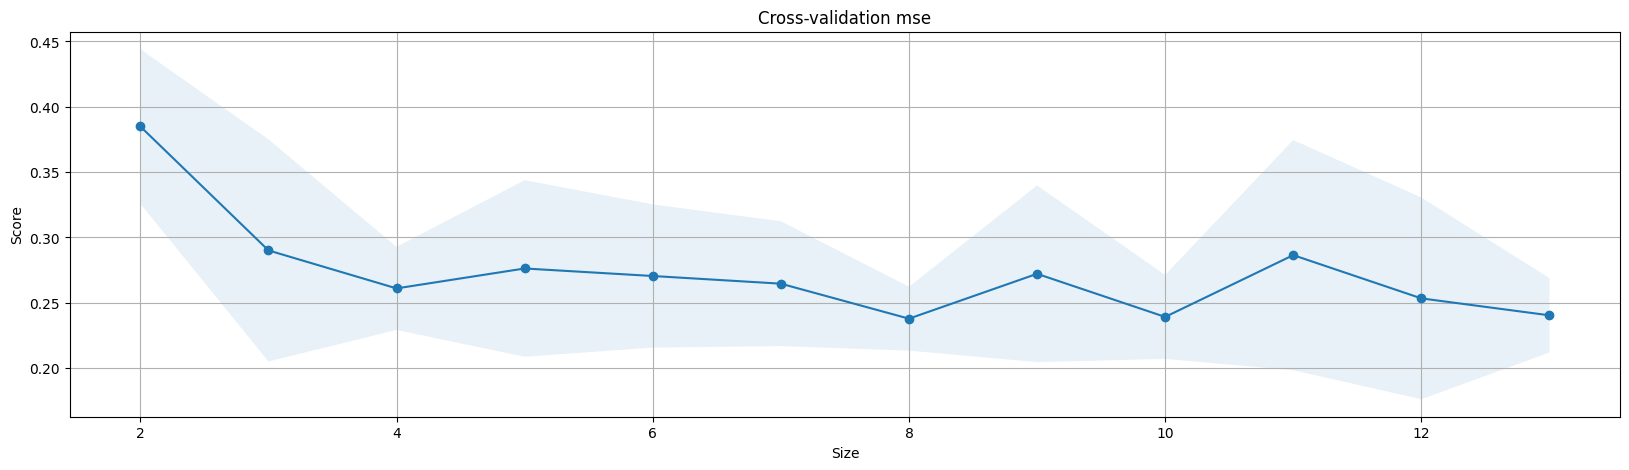

In [26]:
random_fr = RandomForestRegressor(n_estimators=1, random_state=2, bootstrap=False)

max_depth_range = list(range(2, 14, 1))
scoring = make_scorer(mean_squared_error)

train_scores, test_scores = validation_curve(
        random_fr,
        X_train, y_train,
        param_name="max_depth",
        scoring=scoring,
        param_range=max_depth_range,
        cv=5)


def plot_validation_curve(X, y, err, axes = None):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))
    
    axes.grid()
    axes.plot(X, y, "o-")
    axes.fill_between(
        X,
        y - err,
        y + err,
        alpha=0.1,
    )
    axes.set_xlabel("Size")
    axes.set_ylabel("Score")
    axes.set_title("Cross-validation mse")

    return plt

plot_validation_curve(max_depth_range, np.mean(test_scores,axis=1), np.std(test_scores, axis=1)).plot()

Положим, 4, 6 или 8

### b. Визуализируйте предсказания со средними отклонениями +/- 1 стандартное отклонение во всех наборах перекрестной проверки.

<Axes: >

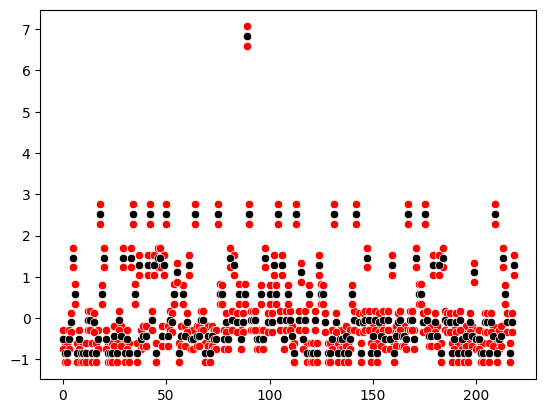

In [34]:
scoring = {'mse': make_scorer(mean_squared_error)}

from sklearn.metrics import mean_squared_error

rr = RandomForestRegressor(n_estimators=1, max_depth=4, bootstrap=False)
rr.fit(X_train,y_train)
pred = rr.predict(X_test)
err = mean_squared_error(pred,y_test)

sns.scatterplot(x=np.arange(0,len(pred),1),y = pred+err, color='red')
sns.scatterplot(x=np.arange(0,len(pred),1),y = pred-err,  color='red')
sns.scatterplot(x=np.arange(0,len(pred),1),y = pred, color="black")

In [35]:
showing = []
for i in range(1,100,5):
    rr = RandomForestRegressor(n_estimators=i, max_depth=6, bootstrap=False)
    rr.fit(X_train,y_train)
    print(rr.score(X_test, y_test))

    showing.append(rr.score(X_test, y_test))

0.7661049719700501
0.7859646502467139
0.7860650967775143
0.7861197799019073
0.7866477702522952
0.7857665709150183
0.7863679647149971
0.7861669832888496
0.7845913821185259
0.7862021433024368
0.7839878621502979
0.7857442835739407
0.785343441030387
0.7870643349817183
0.785608685422588
0.7853435355287417
0.7863389510422772
0.7843909890032577
0.7862216840972088
0.7861070734241186


ValueError: x and y must have same first dimension, but have shapes (20,) and (12,)

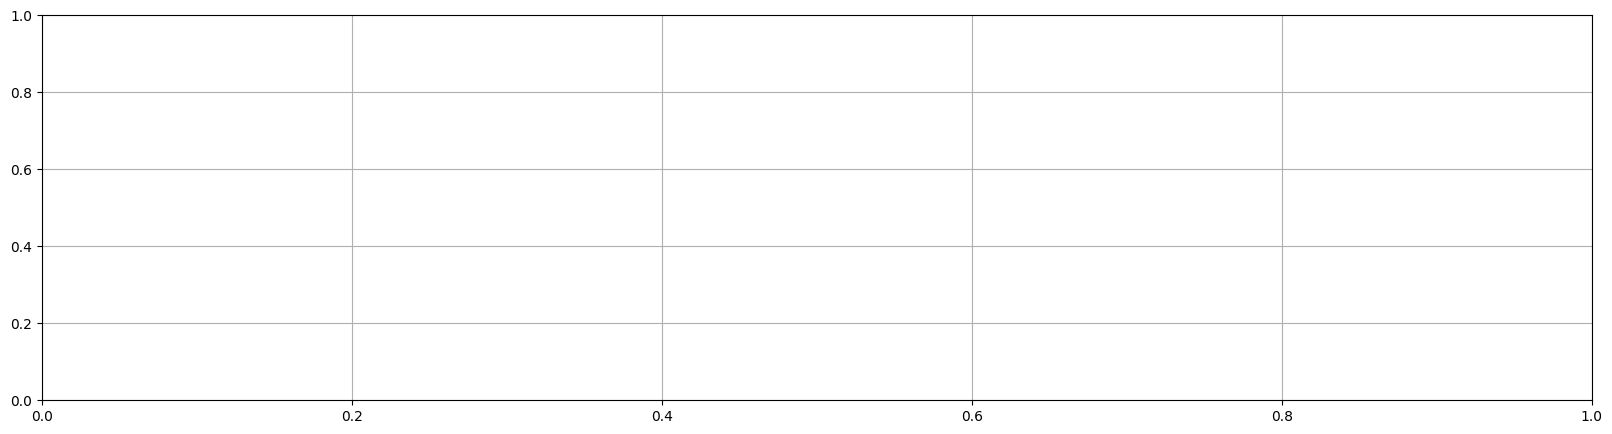

In [30]:
plot_validation_curve(np.arange(1,100,5), np.mean(test_scores,axis=1), np.std(test_scores, axis=1)).plot()

sns.lineplot(x=np.arange(1,100,5),y = showing, color='gray')
sns.lineplot(x=np.arange(1,100,5),y = [2*i + i for i in showing], color='cyan')
sns.lineplot(x=np.arange(1,100,5),y = [-2*i + i for i in showing], color='cyan')